In [1]:
import numpy as np
import h5py
import pickle
import sys
import os
import matplotlib.pyplot as plt

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

import src.models as models 

In [2]:

with h5py.File("scaling_training_regressorV2.h5", "r") as f:
    
    seed_vec_base = f['results/seed'][:]
    ratio_vec_base = f['results/ratio'][:]
    loss_net_vec_base = f['results/loss_net'][:]
    loss_proj_vec_base = f['results/loss_proj'][:]
    pickled_config_base = f['results/config'][()]

config = pickle.loads(pickled_config_base)


unique_hidden_base = np.unique(ratio_vec_base)
loss_net_base_dict = {ele: [] for ele in unique_hidden_base}
loss_proj_base_dict = {ele: [] for ele in unique_hidden_base}

for i in range(len(seed_vec_base)):
    
    loss_net_base_dict[ratio_vec_base[i]].append(loss_net_vec_base[i])
    loss_proj_base_dict[ratio_vec_base[i]].append(loss_proj_vec_base[i])


rmse_net_base_dict = {}
for i, (size, vec) in enumerate(loss_net_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_net_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse_proj_base_dict = {}
for i, (size, vec) in enumerate(loss_proj_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_proj_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))
    

In [3]:
with h5py.File("scaling_training_pcdae_sine_0.05_Vnew.h5", "r") as f:
    
    seed_vec_pcdae = f['results/seed'][:]
    ratio_vec_pcdae = f['results/ratio'][:]
    loss_init_pcdae = f['results/loss_init'][:]
    loss_refine1_pcdae = f['results/loss_refine1'][:]
    loss_refine2_pcdae = f['results/loss_refine2'][:]
    pickled_config = f['results/config'][()]

config_pcdae = pickle.loads(pickled_config)


unique_hidden_pcdae = np.unique(ratio_vec_pcdae)
loss1_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
loss2_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}


for i in range(len(seed_vec_pcdae)):
    loss1_pcdae_dict[ratio_vec_pcdae[i]].append(loss_refine1_pcdae[i])
    loss2_pcdae_dict[ratio_vec_pcdae[i]].append(loss_refine2_pcdae[i])


rmse1_pcdae_dict = {}
for i, (size, vec) in enumerate(loss1_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse1_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse2_pcdae_dict = {}
for i, (size, vec) in enumerate(loss2_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse2_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


In [4]:
print(rmse1_pcdae_dict)

{0.15: (0.03237109134331768, 0.014711895105571646), 0.3: (0.04960242958901382, 0.04633905502495), 0.45: (0.046477101162616434, 0.026502744876391947), 0.6: (0.04135104026656682, 0.017990975771556495), 0.75: (0.06521819348633831, 0.015840066888042903)}


In [5]:
with h5py.File("scaling_training_ebm_pcdae_sine_0.05_Vnew.h5", "r") as f:
    
    seed_vec_pcdae = f['results/seed'][:]
    ratio_vec_pcdae = f['results/ratio'][:]
    loss_init_pcdae = f['results/loss_init'][:]
    loss_refine_ebm_pcdae = f['results/loss_refine'][:]
    pickled_config = f['results/config'][()]

config_pcdae = pickle.loads(pickled_config)


unique_hidden_pcdae = np.unique(ratio_vec_pcdae)
loss_ebm_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}


for i in range(len(seed_vec_pcdae)):
    loss_ebm_pcdae_dict[ratio_vec_pcdae[i]].append(loss_refine_ebm_pcdae[i])


rmse_ebm_pcdae_dict = {}
for i, (size, vec) in enumerate(loss_ebm_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_ebm_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


In [6]:
print(rmse_ebm_pcdae_dict)

{0.15: (0.030925890463342053, 0.01381257177405546), 0.3: (0.046493308370347396, 0.031187921808543805), 0.45: (0.04542611332613777, 0.025873469803723306), 0.6: (0.04831463651957677, 0.019232090837971873), 0.75: (0.07381536693373594, 0.01512525615489385)}


In [7]:
ratio_train_plot = []

mean_pcdae_plot = []
std_pcdae_plot = []

mean_ebm_pcdae_plot = []
std_ebm_pcdae_plot = []

mean_proj_plot = []
std_proj_plot = []


for idx, (ele, val) in enumerate(rmse_proj_base_dict.items()):
    
    train_size = 1 - ele
    mean_pcdae, std_pcdae = rmse1_pcdae_dict[ele]
    mean_ebm, std_ebm = rmse_ebm_pcdae_dict[ele]
    mean_base, std_base = rmse_proj_base_dict[ele]
    
    ratio_train_plot.append(train_size)
    mean_pcdae_plot.append(mean_pcdae)
    std_pcdae_plot.append(std_base)
    mean_ebm_pcdae_plot.append(mean_ebm)
    std_ebm_pcdae_plot.append(std_ebm)
    mean_proj_plot.append(mean_base)
    std_proj_plot.append(std_base)
    

ratio_train_plot = np.array(ratio_train_plot)
mean_pcdae_plot = np.array(mean_pcdae_plot)
std_pcdae_plot = np.array(std_pcdae_plot)
mean_ebm_pcdae_plot = np.array(mean_ebm_pcdae_plot)
std_ebm_pcdae_plot = np.array(std_ebm_pcdae_plot)
mean_proj_plot = np.array(mean_proj_plot)
std_proj_plot = np.array(std_proj_plot)


In [8]:
print(mean_ebm_pcdae_plot)
print(mean_pcdae_plot)

[0.03092589 0.04649331 0.04542611 0.04831464 0.07381537]
[0.03237109 0.04960243 0.0464771  0.04135104 0.06521819]


In [9]:
# print(ratio_train_plot)

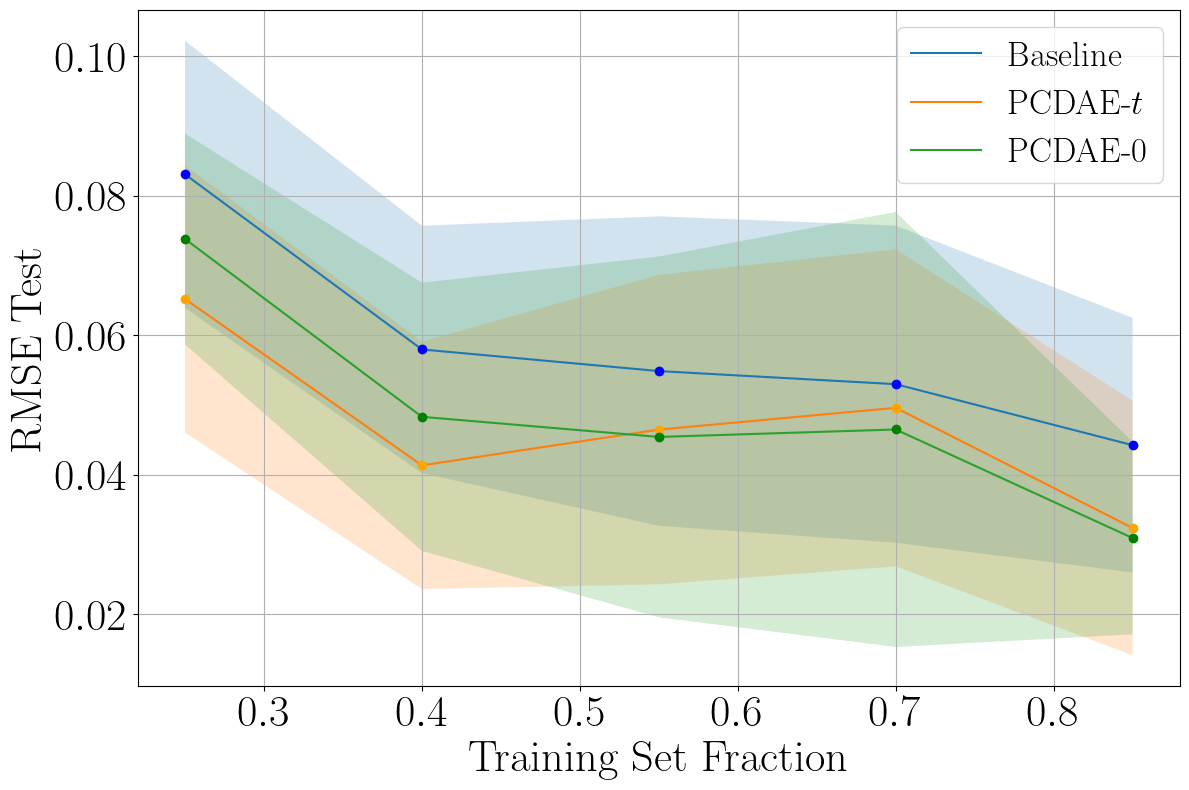

In [14]:

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

plt.plot(ratio_train_plot, mean_proj_plot, label="Baseline")
plt.plot(ratio_train_plot, mean_proj_plot, 'o', color="blue")
plt.fill_between(ratio_train_plot,
                    mean_proj_plot - std_proj_plot,
                    mean_proj_plot + std_proj_plot,
                    alpha=0.2)

plt.plot(ratio_train_plot, mean_pcdae_plot, label="PCDAE-$t$")
plt.plot(ratio_train_plot, mean_pcdae_plot, 'o', color="orange")
plt.fill_between(ratio_train_plot,
                    mean_pcdae_plot - std_pcdae_plot,
                    mean_pcdae_plot + std_pcdae_plot,
                    alpha=0.2)

plt.plot(ratio_train_plot, mean_ebm_pcdae_plot, label="PCDAE-$0$")
plt.plot(ratio_train_plot, mean_ebm_pcdae_plot, 'o', color="green")
plt.fill_between(ratio_train_plot,
                    mean_ebm_pcdae_plot - std_ebm_pcdae_plot,
                    mean_ebm_pcdae_plot + std_ebm_pcdae_plot,
                    alpha=0.2)

plt.xlabel(r'Training Set Fraction', fontsize=32)
plt.ylabel(r'RMSE Test', fontsize=32)
# plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.legend(fontsize=25)
# plt.ylim(0.005, 0.09)
plt.tight_layout()
plt.grid()
plt.savefig("scaling_training_Vnew2.png")

In [11]:
### less params to see 
### more iteatiosn in the baseline